In [2]:
import numpy as np
import matplotlib.pyplot as plt

from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, a_jkValues
from py.analysis import tr, det, lmbd

from py.kernels import gaussian, exponential

from py.explo import collectStabilities



# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [ ]:
params={'I_e': 0, 'I_i': 0, 'end_t': 800, 'length': 50, 'sigma_i': 2.25}
mtx1, mtx2, mtx3 = collectStabilities(params)

<class 'str'> <class 'numpy.ndarray'>
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initialised.
1d Model initial

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,8))

# Set the ticks and ticklabels for all axes
plt.setp((ax0, ax1), xticks=[0,4,8], yticks=[0,4,8])

ax0.imshow(mtx1.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(mtx2.T, vmin=0, vmax=1, aspect='auto')
im2 = ax2.imshow(mtx3.T, vmin=-1, vmax=5, aspect='auto')

ax0.set_title(label='mass bifurcations')
ax1.set_title(label='turing results')
ax2.set_title(label='pattern analysis')
fig.colorbar(im2, orientation='vertical')

In [ ]:
ee = 3.714286
ii = 8.000000
params={'I_e': ee, 'I_i': ii, 'n': 350, 'length': 10, 'end_t': 2000} 
ps = setParams(params)

In [ ]:
fps = computeFPs(ps)

In [412]:
fps

array([], dtype=float64)

In [413]:
stab = checkFixPtsStability(fps, ps)

In [414]:
stab

[]

In [357]:
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)

In [358]:
l=61
k = np.linspace(-2,2,l)
determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
trace = tr(k, a_ee, a_ii, ps)
zero = np.zeros(l)

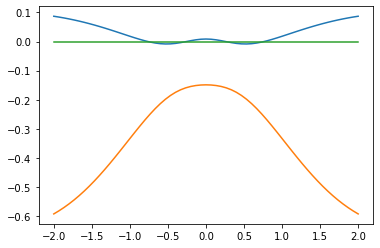

In [359]:
plt.plot(k, determinant, k, trace)
plt.plot(k, zero)

In [10]:
lmbda = lmbd(k, a_ee, a_ei, a_ie, a_ii, ps)

Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian
Using fourier transformation of gaussian: f_gaussian


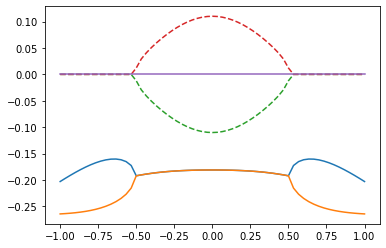

In [11]:
plt.plot(k, lmbda[0].real, k, lmbda[1].real)
plt.plot(k, lmbda[0].imag, k, lmbda[1].imag, linestyle='dashed')
plt.plot(k, zero)

In [105]:
trace2 = lmbda[0]+lmbda[1]
determinant2 = lmbda[0]*lmbda[1]

/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


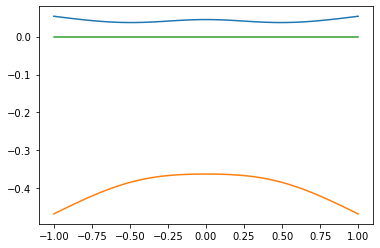

In [106]:
plt.plot(k, determinant2, k, trace2)
plt.plot(k, zero)

In [25]:
kernel = gaussian(10, ps.x)*ps.dx

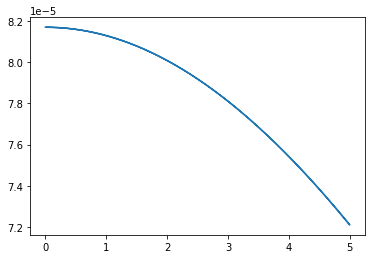

In [26]:
plt.plot(ps.x, kernel)

In [59]:
def checkTuringStability(det, tr):
    if all(det>=0) and all(tr<=0):
        turing=0
    else:
        turing=1

    return turing

In [69]:
import numpy as np
from py.params import setParams


def collectStabilities(params=None, vary_params={'I_e': np.linspace(1,5,21), 'I_i': np.linspace(0,4,21)}, pattern_analysis=False):
    
    var1_str, var1 = list(vary_params.items())[0]
    var2_str, var2 = list(vary_params.items())[1]
    var2 = var2[::-1]
    
    print(type(var1_str), type(var1))
    
    nn = len(var1)
    mm = len(var2)
    
    mass_bifs = np.zeros((nn,mm))
    turing_bifs = np.zeros((nn,mm))
    pattern_mtx = np.zeros((nn,mm))
    
    for i in range(nn):
        for j in range(mm):
            params[var1_str] = var1[i]
            params[var2_str] = var2[j]
            
            ps = setParams(params)
            fps = computeFPs(ps)
            stab = checkFixPtsStability(fps, ps)
            
            if sum(stab) == 2:
                mass_bifs[i,j] = 1
                l=61
                k = np.linspace(-2,2,l)
                a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)
                determinant1 = det(k, a_ee, a_ei, a_ie, a_ii, ps)
                trace1 = tr(k, a_ee, a_ii, ps)
                turing1 = checkTuringStability(determinant1, trace1)
                a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[-1], ps)
                determinant2 = det(k, a_ee, a_ei, a_ie, a_ii, ps)
                trace2 = tr(k, a_ee, a_ii, ps)
                turing2 = checkTuringStability(determinant1, trace1)
                turing_bifs[i,j]=max(turing1, turing2)
                if turing1 == 1:
                    print('for I_e = %f, I_i = %f, we have turing1=%i' %(var1[i],var2[j],turing1))
                elif turing2 == 1:
                    print('for I_e = %f, I_i = %f, we have turing2=%i' %(var1[i],var2[j],turing1))
            elif sum(stab) == 1:
                mass_bifs[i,j] = 0.5
                l=61
                k = np.linspace(-2,2,l)
                a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[list(stab).index(1)], ps)
                determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
                trace = tr(k, a_ee, a_ii, ps)
                turing = checkTuringStability(determinant, trace)
                turing_bifs[i,j]=turing
                if turing == 1:
                    print('for I_e = %f, I_i = %f, we have turing=%i' %(var1[i],var2[j],turing))
            else:
                mass_bifs[i,j] = 0
                
            
            patterns = np.zeros(len(fps))
            for idx, fp in enumerate(fps):
                p, a,b,c,d = collectPatterns(fp, ps, last_sec=10)
                patterns[idx] = p
            
            if len(patterns)==0:
                pattern_mtx[i,j] = -1
            elif all(x == patterns[0] for x in patterns):
                pattern_mtx[i,j] = patterns[0]
            else:
                pattern_mtx[i,j] = 5
                
            
            print('We are in round I_e = %f, I_i = %f, i=%i, j=%i with pattern %s' %(var1[i],var2[j],i,j, str(patterns)))
    
    return mass_bifs, turing_bifs, pattern_mtx

In [70]:
vary_params={'I_e': np.linspace(0,8,61), 'I_i': np.linspace(0,8,61)}

In [71]:
var1_str, var1 = list(vary_params.items())[0]

In [72]:
var1[::-1]

array([8.        , 7.86666667, 7.73333333, 7.6       , 7.46666667,
       7.33333333, 7.2       , 7.06666667, 6.93333333, 6.8       ,
       6.66666667, 6.53333333, 6.4       , 6.26666667, 6.13333333,
       6.        , 5.86666667, 5.73333333, 5.6       , 5.46666667,
       5.33333333, 5.2       , 5.06666667, 4.93333333, 4.8       ,
       4.66666667, 4.53333333, 4.4       , 4.26666667, 4.13333333,
       4.        , 3.86666667, 3.73333333, 3.6       , 3.46666667,
       3.33333333, 3.2       , 3.06666667, 2.93333333, 2.8       ,
       2.66666667, 2.53333333, 2.4       , 2.26666667, 2.13333333,
       2.        , 1.86666667, 1.73333333, 1.6       , 1.46666667,
       1.33333333, 1.2       , 1.06666667, 0.93333333, 0.8       ,
       0.66666667, 0.53333333, 0.4       , 0.26666667, 0.13333333,
       0.        ])

In [75]:
params={'I_e': 0, 'I_i': 0, 'end_t': 800, 'length': 50, 'sigma_i': 2}

In [ ]:
mtx1, mtx2, mtx3 = collectStabilities(params)

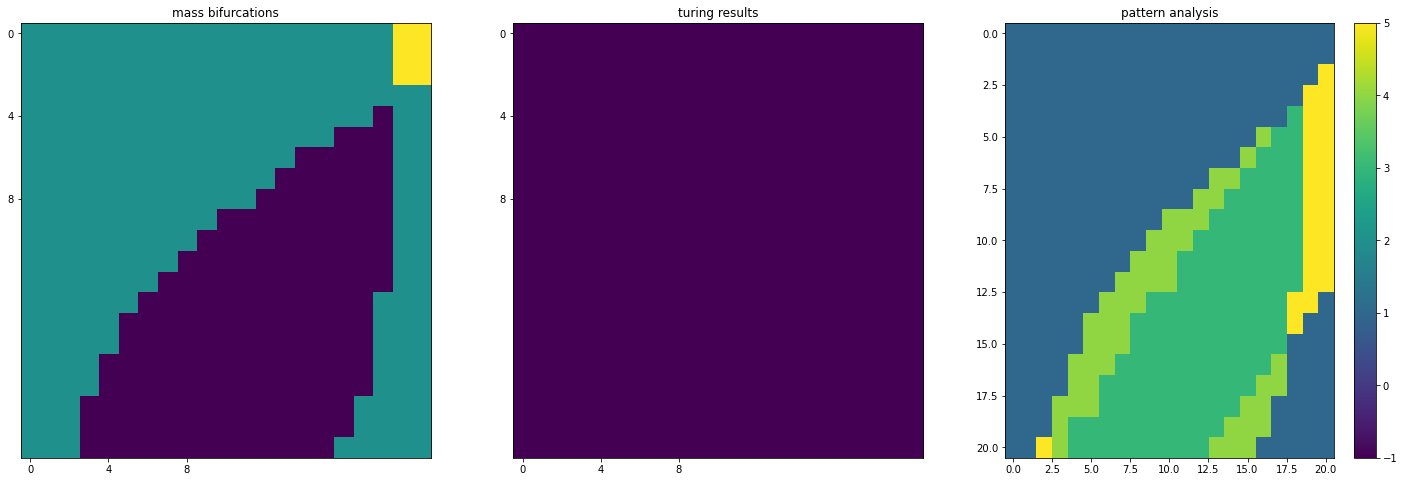

In [77]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,8))

# Set the ticks and ticklabels for all axes
plt.setp((ax0, ax1), xticks=[0,4,8], yticks=[0,4,8])

ax0.imshow(mtx1.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(mtx2.T, vmin=0, vmax=1, aspect='auto')
im2 = ax2.imshow(mtx3.T, vmin=-1, vmax=5, aspect='auto')

ax0.set_title(label='mass bifurcations')
ax1.set_title(label='turing results')
ax2.set_title(label='pattern analysis')
fig.colorbar(im2, orientation='vertical')

In [67]:
mtx3

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  5.,  3.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,
         3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,
         3.,  3.,  3.,  3.],
       [-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  3.,
         3.,  3.,  3.,  3.],
       [-1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  3.,  3.,
         3.,  3.,  3.,  3.],
       [-1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  3.,  3.,  3.,
         

In [68]:
def getPSD(array, fs, maxfreq=None):
    """returns the Powerspectrum (density: [V**2/Hz]) with the possibility to cut off the PSD at a maximum frequency
    
    INPUT:
    :array: time series (type: numpy-array)
    :fs: sampling frequency of array (e.g. variables['delta_t'] for array over time, variables['n'] for array over space)
    :maxfreq: maximum frequency to observe
    
    OUTPUT:
    :freqs: array of all frequencies that are looked at for the PDS
    :PSD_den: Power Spectrum Density (i.e. returns the power per frequency over the freqs array)
    """
    import scipy.signal as signal 
    
    freqs, Pxx_den = signal.welch(array, fs)
    
    if maxfreq==None:
        maxfreq = max(freqs)
    
    freqs = freqs[freqs < maxfreq]
    Pxx_den = Pxx_den[0 : len(freqs)]
    
    return freqs, Pxx_den



def getAvgPSD(arrays, fs, maxfreq=None):
    """Returns the average Power Spectrum Density for a mxn-dimensional array.
    
    INPUT:
    :arrays: mxn-dimensional array (m rows, n columns)
    :fs: sampling frequency
    :maxfreq: maximum frequency
    
    OUTPUT:
    :freqs: array of all frequencies that are looked at for the avg-PSD
    :avg_Pxx_den: average PSD (averages over rows)
    
    e.g. I give the array exc with dimension 37x4000
    then the PSD will be computed for frequencies over time and averaged over rows, which are the nodes (space)
    => returned avg_Pxx_den indicates the power per frequencies over time averaged over each node
    i.e. in that case, if the avg_Pxx_den is close to zero everywhere, I do not have a change in activity over time => temporally homogeneous
    
    """
    
    freqs, temp_Pxx_den = getPSD(arrays[0], fs, maxfreq)
    
    all_Pxx_den = np.zeros((int(arrays.shape[0]),(len(temp_Pxx_den))))
    
    for idx, array in enumerate(arrays[1:]):
        f, Pxx_den = getPSD(array, fs, maxfreq)
        all_Pxx_den[idx+1] = Pxx_den
        
    avg_Pxx_den = np.mean(all_Pxx_den, axis=0)
        
    
    return freqs, avg_Pxx_den


In [50]:
import py.continuum1d as continuum1d
c1d = continuum1d.continuum1d()



def collectPatterns(fp, params, last_sec=10):
    
    """ This function collects the type of activity-pattern that is shown after running a simulation for different settings of parameters (fix given by params, varied in trng-df DataFrame) initialized in each available fixed point per parametrization. Pattern-Identification on basis of frequency over space and over time.
    
    INPUT:
    :mtype: type of model, string, either 'activity' or 'voltage' 
    :trng_df: pandas-DataFrame, column 1 and column 2 in trng_df are the parameters that were varied, there is one column that gives all available fixed points per parametrization, named 'fixed_points' 
    :params: dictionary of fix parameters
    :variables: dictionary of variables (duration, #pixels,  delta_t)
    
    OUTPUT:
    :df: pandas-Dataframe with [varied_param1, varied_param2, patterns], where 'patterns' is a list of the same length as 'fixed_points' with numbers from 1-4, indicating the emerging pattern after initialising the model in the corresponding fixed point.
    stationary=1
    temporal=2
    spatial=3
    spatiotemporal=4
    e.g. parametrization shows 3 fixed points, [fp1, fp2, fp3], init in fp1 shows spatial, in fp2 &fp3 stationary patterns => patterns=[3,1,1]"""

    exc, inh = c1d.run(params, itype='inte_fft', fp=fp)
        
   # print('exc[-10]', exc[-10])
   # print('exc.T[-10]', exc.T[-10])
    #the returned activity is returned in shape: rows per time step, len(row)=#of pixels
    #we transpose that to have a matrix with one row per pixel, and coulmns=time steps.
    x = exc.T
    temp = int(last_sec*(1/params.dt))
    x = x[:,-temp:]
    
 #   print('x before Pxx computation', x.flatten() )
    
    
    #to identify whether there is change over time per node 
    #("per node there is a frequency>0 => temporal pattern"), we get the average
    #PSD over time and check, whether all(power(frequencies)) are close to 0: 
    #if returned false, then there is a frequency with power >0
    #i.e. a change in activity over time => temporal pattern
    #investigated time series-matrix: x=(rows=nodes, columns=time steps), 
    #e.g. 37 nodes and 5 seconds => shape=(37,5*variables['delta_t'])
    
    fs = params.n
    f_time, Pxx_den_time = getAvgPSD(x, fs)
    temporally_homogeneous = all(Pxx_den_time <=0.1*(10**(-5)))  #all(np.isclose(Pxx_den_time,0))
    
    #to identify vise verca, if there is a change in activiy over space, 
    #we check the frequency over nodes per time step, 
    #hence transpose x again
    x=x.T
    fs = params.dt
    f_space, Pxx_den_spatial = getAvgPSD(x, fs)
    spatially_homogeneous = all(Pxx_den_spatial <=0.1*(10**(-5)))  #np.isclose(Pxx_den_spatial,0))
    
    if spatially_homogeneous and temporally_homogeneous:
        pattern = 1
    elif spatially_homogeneous and not temporally_homogeneous:
        pattern = 2
    elif not spatially_homogeneous and temporally_homogeneous:
        pattern = 3
    else:
        pattern = 4
        
 #   print('In pattern collection, pattern: ', pattern)
        
    return pattern, Pxx_den_time, f_time, Pxx_den_spatial, f_space

1d Model initialised.


In [51]:
pa = {'I_e': 2.0, 'I_i': 0.75, 'end_t': 800,'length': 50}

In [52]:
ps = setParams(pa)
fps = computeFPs(ps)
stab = checkFixPtsStability(fps, ps)
fps

array([[0.313055  , 0.23289628]])

In [53]:
fp = fps[0]

In [54]:
pat, Pxx_den_time, f_time, Pxx_den_spatial, f_space = collectPatterns(fp, ps, last_sec=10)

/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 128, using nperseg = 128
  warnings.warn('nperseg = {0:d} is greater than input length '


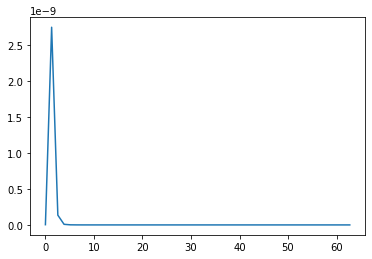

In [55]:
plt.plot(f_time, Pxx_den_time)

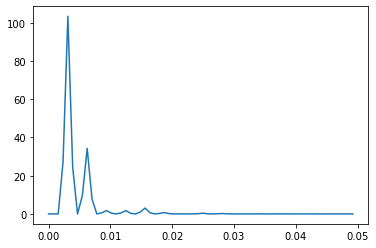

In [56]:
plt.plot(f_space,Pxx_den_spatial)

In [57]:
pat


3

In [58]:
Pxx_den_time

array([3.14853376e-12, 2.74967407e-09, 1.35697475e-10, 8.48108944e-12,
       1.35694643e-12, 3.39220764e-13, 1.10756357e-13, 4.32579461e-14,
       1.92214459e-14, 9.41540905e-15, 4.97774142e-15, 2.79820821e-15,
       1.65435298e-15, 1.02019407e-15, 6.52013864e-16, 4.29676795e-16,
       2.90773762e-16, 2.01388036e-16, 1.42350352e-16, 1.02447354e-16,
       7.49169372e-17, 5.55691818e-17, 4.17440287e-17, 3.17152295e-17,
       2.43400346e-17, 1.88481390e-17, 1.47116261e-17, 1.15631570e-17,
       9.14352553e-18, 7.26744870e-18, 5.80089070e-18, 4.64580622e-18,
       3.72973294e-18, 2.99859987e-18, 2.41169785e-18, 1.93812250e-18,
       1.55423202e-18, 1.24181231e-18, 9.86740575e-19, 7.78003547e-19,
       6.06970604e-19, 4.66851785e-19, 3.52291109e-19, 2.59059863e-19,
       1.83824423e-19, 1.23970236e-19, 7.74685916e-20, 4.27764855e-20,
       1.87625129e-20, 4.65375057e-21])